# MSA 2025 Phase 2 - Part 1

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


## 1. Find all variables and understand them

In [14]:
df_features = pd.read_csv("features.csv")
df_features.head(10)
df_features.info()
df_features.describe(include='all')  
print(df_features.dtypes)
df_features['Date'] = pd.to_datetime(df_features['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CP

In [15]:
df_sales = pd.read_csv("sales.csv")
df_sales.head(10)
df_sales.info()
df_sales.describe(include='all')
print(df_sales.dtypes)
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


In [16]:
df_stores = pd.read_csv("stores.csv")
df_stores.head(10)
df_stores.info()
df_stores.describe(include='all')  
print(df_stores.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
Store     int64
Type     object
Size      int64
dtype: object


## 2. Clean data

In [17]:
df_features['Date'] = pd.to_datetime(df_features['Date'])
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df_features[markdown_cols] = df_features[markdown_cols].fillna(0)
df_features['CPI'] = df_features['CPI'].fillna(df_features['CPI'].mean())
df_features['Unemployment'] = df_features['Unemployment'].fillna(df_features['Unemployment'].mean())

df_sales['Date'] = pd.to_datetime(df_sales['Date'])
Q1 = df_sales['Weekly_Sales'].quantile(0.25)
Q3 = df_sales['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
df_sales = df_sales[~((df_sales['Weekly_Sales'] < Q1 - 1.5 * IQR) | 
                      (df_sales['Weekly_Sales'] > Q3 + 1.5 * IQR))]

df_stores['Type'] = df_stores['Type'].astype('category')
print(df_stores.isnull().sum())

merged = pd.merge(df_sales, df_features, how='left', on=['Store', 'Date'])
final_df = pd.merge(merged, df_stores, how='left', on='Store')

final_df['Month'] = final_df['Date'].dt.month
final_df['Month_Name'] = final_df['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
final_df['Month_Name'] = final_df['Month_Name'].astype('category')

print(final_df.info())
print(final_df.head())








Store    0
Type     0
Size     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386049 entries, 0 to 386048
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         386049 non-null  int64         
 1   Dept          386049 non-null  int64         
 2   Date          386049 non-null  datetime64[ns]
 3   Weekly_Sales  386049 non-null  float64       
 4   IsHoliday_x   386049 non-null  bool          
 5   Temperature   386049 non-null  float64       
 6   Fuel_Price    386049 non-null  float64       
 7   MarkDown1     386049 non-null  float64       
 8   MarkDown2     386049 non-null  float64       
 9   MarkDown3     386049 non-null  float64       
 10  MarkDown4     386049 non-null  float64       
 11  MarkDown5     386049 non-null  float64       
 12  CPI           386049 non-null  float64       
 13  Unemployment  386049 non-null  float64       
 14  IsHoliday_y   386049 n

## 3. Visualise data

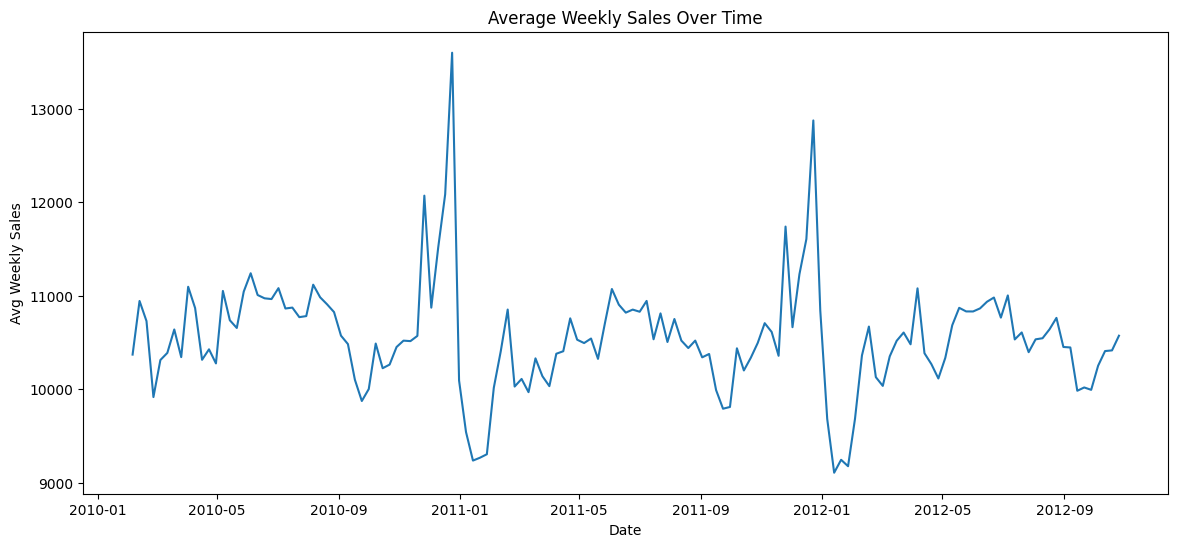

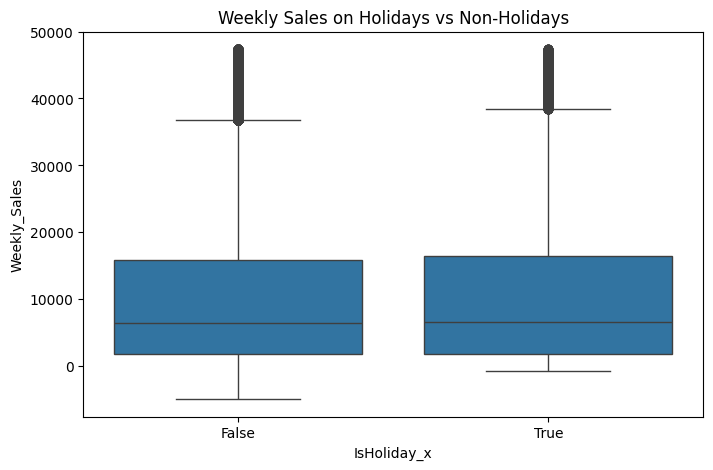

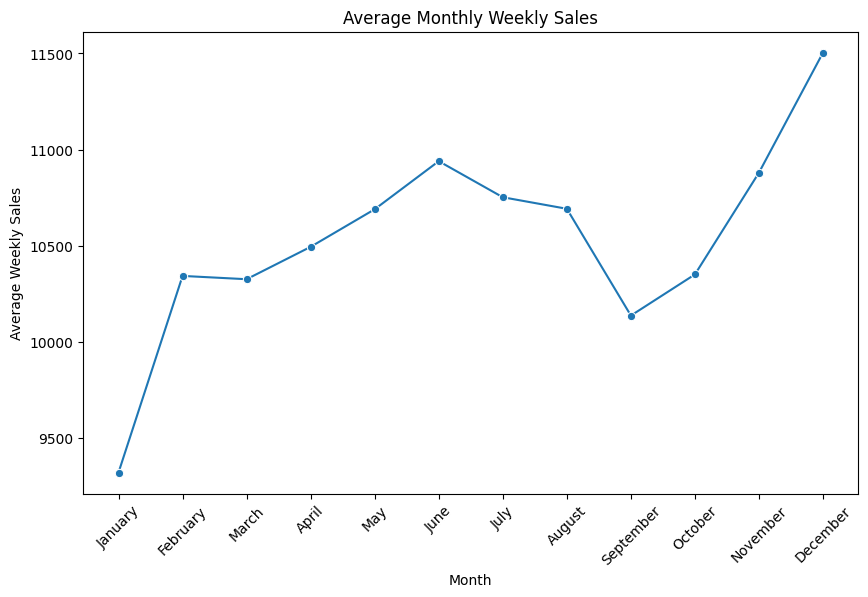

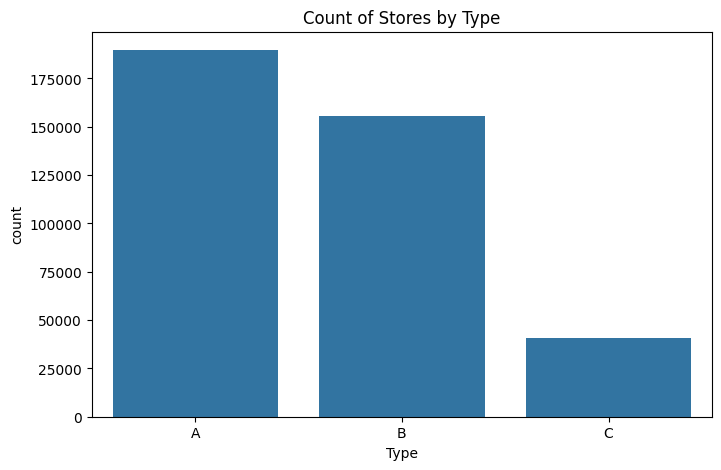

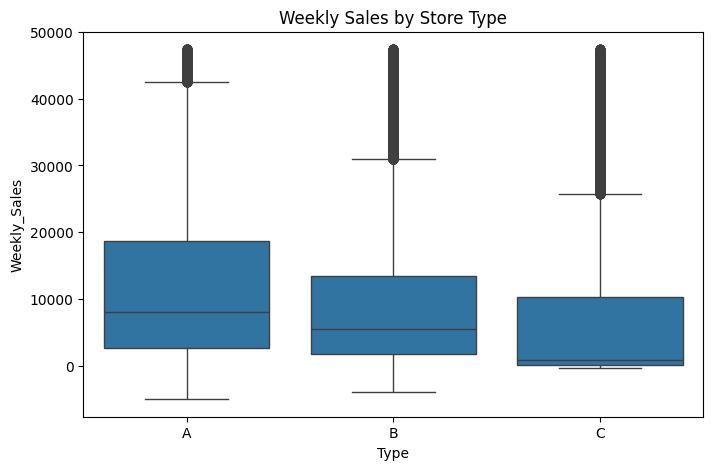

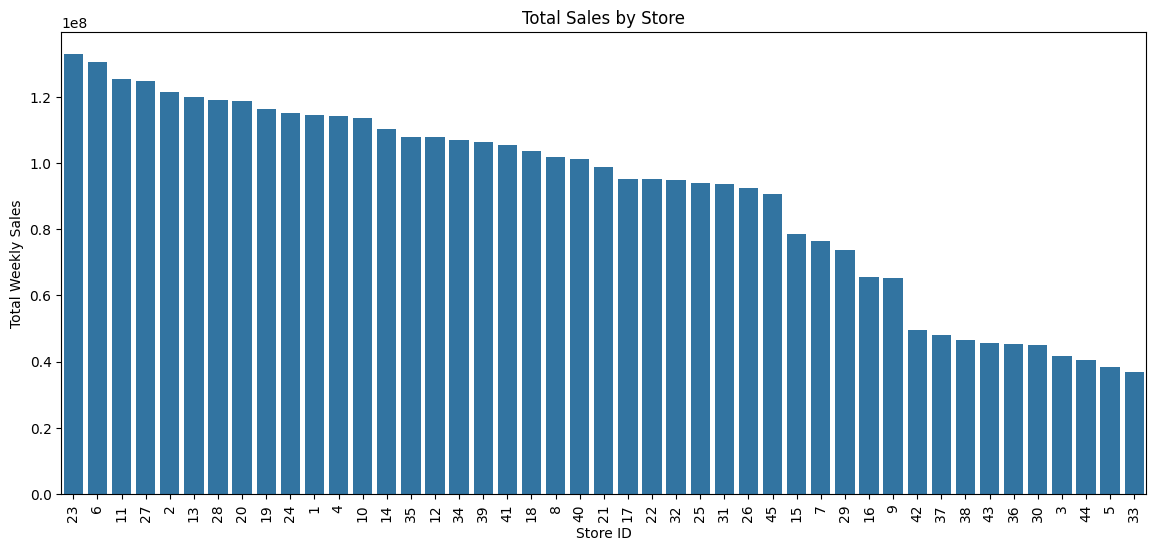

In [26]:

weekly_avg = final_df.groupby('Date')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=weekly_avg, x='Date', y='Weekly_Sales')
plt.title('Average Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Weekly Sales')
plt.show()

# 2. Boxplot of Weekly Sales by Holiday
plt.figure(figsize=(8,5))
sns.boxplot(x='IsHoliday_x', y='Weekly_Sales', data=final_df)  
plt.title('Weekly Sales on Holidays vs Non-Holidays')
plt.show()

# 3. Average Weekly Sales over months using 'Month_Name' (already created in cleaning)
monthly_sales = final_df.groupby('Month_Name', observed=False)['Weekly_Sales'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
).reset_index()


plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Month_Name', y='Weekly_Sales', marker='o')
plt.title('Average Monthly Weekly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.show()

# 4. Bar plot of store types counts
plt.figure(figsize=(8,5))
sns.countplot(x='Type', data=final_df)
plt.title('Count of Stores by Type')
plt.show()

# 5. Boxplot of Weekly Sales by Store Type
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Weekly_Sales', data=final_df)
plt.title('Weekly Sales by Store Type')
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, order=store_sales['Store'])
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.show()






## 4. Identify correlated variables

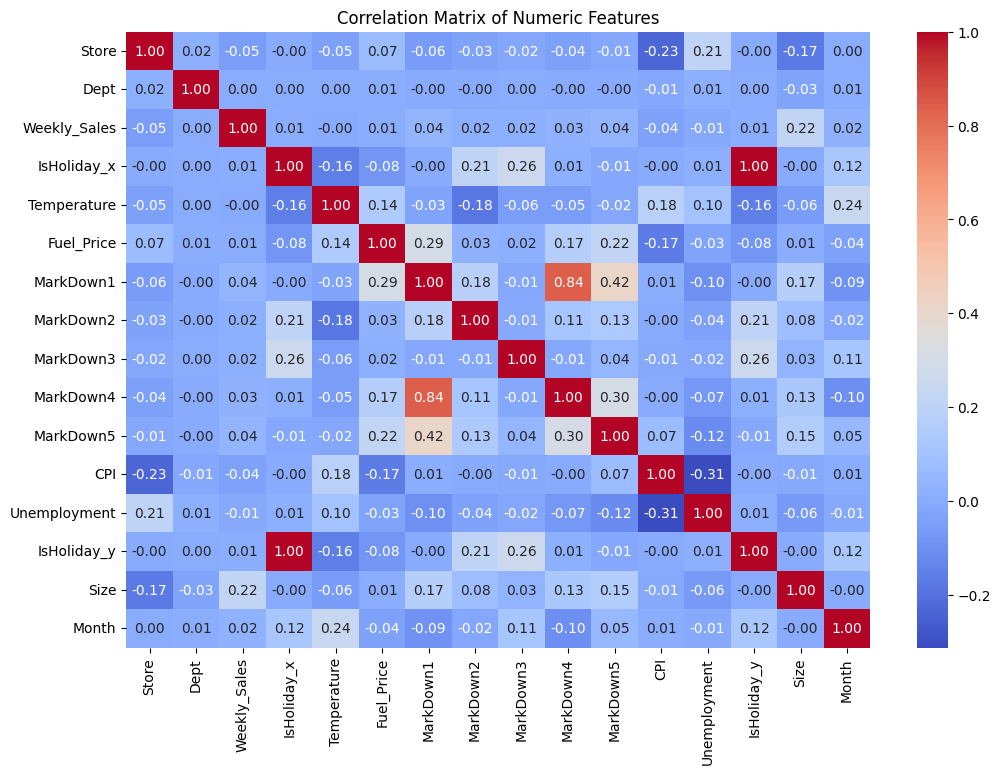

Highly correlated variable pairs (|corr| > 0.8):
IsHoliday_x and IsHoliday_y: 1.00
MarkDown1 and MarkDown4: 0.84


In [19]:
corr = final_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()
threshold = 0.8
high_corr = [(corr.columns[i], corr.columns[j], corr.iloc[i, j])
             for i in range(len(corr.columns)) for j in range(i+1, len(corr.columns))
             if abs(corr.iloc[i, j]) > threshold]

print("Highly correlated variable pairs (|corr| > 0.8):")
for var1, var2, val in high_corr:
    print(f"{var1} and {var2}: {val:.2f}")


## 5. Summary

Exploratory Data Analysis & Preprocessing Summary
In Part One of this project, I performed exploratory data analysis (EDA) and data preprocessing on the W Stores dataset. The datasets provided included:
df_features: Store-level economic indicators and markdown data
df_sales: Weekly sales records for each store and department
df_stores: Metadata containing information about individual stores


Step One – Data Loading and Initial Exploration
The first step involved loading the datasets into pandas DataFrames and examining their structure. I reviewed the data types to identify whether columns were numerical, categorical, or date-based, and inspected the relationships between the datasets. This allowed me to determine suitable primary keys (e.g. Store, Date) for merging the data into a single unified dataset.


Step Two – Data Cleaning and Preparation
In this stage, I performed several preprocessing tasks to ensure the data was ready for analysis and modelling:
Handling missing values:
I filled missing values in markdown columns with 0, under the assumption that missing markdowns likely indicate no promotion. For continuous variables such as CPI and Unemployment, I used the mean to impute missing values.
Date processing:
I converted all date columns to datetime objects to enable time-based analysis and feature extraction.
Outlier removal:
Using the Interquartile Range (IQR) method, I removed extreme outliers in the Weekly_Sales column to prevent skewing during model training and analysis.
Data type conversions:
Categorical fields such as Type and IsHoliday were converted to appropriate types (e.g. category) to improve memory efficiency and prepare for encoding if required.
Dataset merging:
After cleaning individual datasets, I merged them using common keys (Store, Date) to form a comprehensive DataFrame called final_df. This combined store metadata, economic indicators, markdown promotions, and weekly sales into a single structure.
Feature engineering:
I extracted time-based features including Month and Month_Name from the Date column. These were useful for identifying seasonality and time-based trends in the data.


Step Three – Exploratory Data Analysis (EDA)
With the cleaned dataset in place, I carried out exploratory analysis to better understand sales behaviour across time, store types, and promotional conditions:


Sales over time:
I created a line plot showing the average Weekly_Sales over time. This visualisation revealed seasonal fluctuations, with clear peaks near the end of the year—likely due to increased holiday spending.
Holiday vs Non-Holiday sales:
A boxplot comparing sales during holiday periods (IsHoliday=True) and regular weeks showed that while the medians were comparable, the spread (IQR) during holidays was more concentrated. This suggests some uplift in sales during holiday weeks, though not dramatically different.
Monthly trends:
By plotting the average sales grouped by Month_Name, I observed a consistent increase in November and December, reinforcing the importance of seasonal planning for end-of-year sales performance.
Store type distribution and performance:
I plotted the count of stores by type and created a boxplot to compare weekly sales across types (A, B, C) and the count of the store types. The results suggested that certain store types (e.g. Type A) outperformed others in terms of median weekly sales, possibly due to differences in store size, location, or product offerings.
Store-level sales:
A bar chart displaying total weekly sales by store helped identify top-performing stores. This visualisation made it easy to compare relative performance and uncover which stores consistently generate higher revenue.


Step Four – Identifying Correlated Variables
To assess multicollinearity and inform future feature selection, I created a correlation matrix for all numerical features using final_df.corr(numeric_only=True). The matrix was visualised with a heatmap, including annotated correlation coefficients for clarity.
From this, I extracted variable pairs with a high correlation (above 0.8 or below -0.8). Recognising these strong linear relationships is important during modelling, as highly correlated variables can introduce redundancy and inflate model variance. If necessary, one of each correlated pair can be removed or combined to improve model efficiency and interpretability.



Conclusion
This workflow allowed me to thoroughly prepare and explore the W Stores dataset in a structured and analytical way. The process of cleaning, merging, and analysing the data gave me insights into sales trends, seasonal behaviours, store performance differences, and potential data dependencies. This foundation is now ready to support feature selection and model training in the next phase of the project.